<a href="https://colab.research.google.com/github/TedHaley/courses/blob/master/introduction_to_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Neural Networks

Overview:  
Models such as linear regression can be used to make predictions. It makes predictions by generating weights for some parameters and then adding those parameters together, ex:


y = m1X1 + m2X2 + b. 

salary = 10,000 * years_exp + 50,000


Where m1 and m2 are the weights. We can also have linear models that have interacting variables, such as:


y = (m1X1 * m2X2) + b. 

salary = (10,000 * years_exp * 1.1* age) + 50,000


This is a very basic example of interactivity between variables. Neural networks are similar to this but take it to the next level as they model many iteractions between many inputs, and then use those interactions as inputs for other interactions.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/280px-Colored_neural_network.svg.png)

As nodes increase, so does the ability to capture interactions.

![alt text](https://drive.google.com/uc?id=1fdjoM2tBhsQektdjG1882m5TV9FD9rkg)

Forward Propogation:  
Forward propogation is when we place weights on the lines between nodes. The output node is equal to the sum of the input nodes times the line weights. This operation is dot product.

Example:

![alt text](https://drive.google.com/uc?id=1eJ5OLqSjIDluwHcomk2tYZbyGHVK_IWi)

hidden layer node 0 = (2 * 1) + (3 * 1) = 5





In [1]:
import numpy as np

input_data = np.array([2, 3])

weights = {
    'node_0': np.array([1, 1]),
    'node_1': np.array([-1, 1]),
    'output': np.array([2, -1]),
}

# [2, 3] * [1, 1] = (2 * 1) + (3 * 1) = 5 
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()
output_value = (np.array([node_0_value, node_1_value]) * weights['output']).sum()

print('node 0:', node_0_value)
print('node 1:', node_1_value)
print('Output:', output_value)

node 0: 5
node 1: 1
Output: 9


Activation Function:  
Activation functions are found within the hidden layers. Activation functions allow hidden layers to capture non-linearities. One popular activation function is ReLU (rectified linear activation), with is 0 below zero, and linear above zero for x. In the below example, we are going to use tanh as our activation function.

![alt text](https://drive.google.com/uc?id=1R_aqYRh66slQSt3YY0n1wWRTOtF8DCRa)






In [2]:
import numpy as np

input_data = np.array([2, 3])

weights = {
    'node_0': np.array([1, 1]),
    'node_1': np.array([-1, 1]),
    'output': np.array([2, -1]),
}

node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)

output = (np.array([node_1_input, node_1_output]) * weights['output']).sum()

print('node 0:', node_0_output)
print('node 1:', node_1_output)
print('Output:', output)

node 0: 0.9999092042625951
node 1: 0.7615941559557649
Output: 1.2384058440442351


In [3]:
# Using ReLU function

def relu(input):
    '''0 below 0, x above 0.'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

9


Deep Networks  
 - Deep networks internally build representations of patterns in the data
 - Partially replace the need for feature engineering
 - Subsequrnt layers build increasingly sophisticated representations of raw data

![alt text](https://drive.google.com/uc?id=1QMVRnZHgG1FPYHgJ_c5_X1nj3Lws3ffP)

In [4]:
# Multi-layer networks
def predict_with_network(input_data, weights):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

weights = {
    'node_0_0': np.array([2, 4]),
    'node_0_1': np.array([ 4, -5]),
    'node_1_0': np.array([-1,  2]),
    'node_1_1': np.array([1, 2]),
    'output': np.array([2, 7])
 }
input_data = np.array([3, 5])
output = predict_with_network(input_data, weights)
print(output)

182


Training a Network:  
Neural networks are trained using labelled data. The value of the weights for each line are changed to get the desired output.

![alt text](https://drive.google.com/uc?id=1d65zM3Re55BS62mzqssqJS9XJxlvFaLJ)

We use back propogation to go back and re-weight the lines to get the desired output.

![alt text](https://drive.google.com/uc?id=12gM57rbKz0VQ9jYzyyDuNprv0Vy7Bn-e)

The challenge becomes when we are trying to make multiple accurate predictions with a static network. Each outcome is associated with its own error.

Loss Function  
The loss function is used to aggregate errors in many predictions to form a single number. This is a measure of a model's predictive performance.

A common loss function is Mean Squared Error (MSE), where we square each error and take the average of the squared errors. We need to optimize the weights of the model to minimize the loss function.

![alt text](https://drive.google.com/uc?id=1eKpqtdRmYIyBfiaC9LSpGzRofsbODznL)


Optimize the Loss Function  
A simple method for optmizing this loss function is by using gradient descent. We take the derivative at the current point to find the slope of the line. We take a step in the opposite direction of the slope to go to a minima.

![alt text](https://drive.google.com/uc?id=1V-gP00xaaRqOSzc6TR7YSsVrbMPbAjhN)

We need to make sure we don't step too quickly as we might miss the minima. This is why we use learn rate (often 0.01)
step size = learning rate * slope

Slope Caluclation Example:  
Node 1 = 3
weight = 2
Node 2 = 6
Actual target = 10

slope = 2 * error * input = 2 * (6-10) * 3 = -24
new weight = weight - lr(slope) = 2 - 0.01(-24) = 2.24




In [5]:
# Coding how weight changes affect accuracy

def predict_with_network(input_data, weights):
    # Calculate node 0 in the first hidden layer
    node_0_input = (input_data * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 in the first hidden layer
    node_1_input = (input_data * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_0_output, node_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [6]:
# Scaling up to multiple data points

from sklearn.metrics import mean_squared_error

weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

weights_1 = {'node_0': [2, 1],
             'node_1': [1, 1.5],
             'output': [1, 1.5]
            }

input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(model_output_0, target_actuals)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(model_output_1, target_actuals)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


Calculate slope and update weights

Target is 6

![alt text](https://drive.google.com/uc?id=1isFICLF_N4x1pvs1jh04eKECBSRptS1t)



In [7]:
# Gradient descent 
import numpy as np

weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01

preds = (weights * input_data).sum()
error = preds - target
print(error)

gradient = 2 * input_data * error
weights_updated = weights - learning_rate * gradient

preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

5
2.5


Creating a Keras model  
 - specify architechture
 - compile
 - fit
 - predict



In [8]:
# Model specification

!pip install tensorflow==1.14.0
import tensorflow as tf

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from keras.layers import Dense
from keras.models import Sequential

data = load_iris()
predictors = pd.DataFrame(data = data.data, columns=data.feature_names)
target = data['target']

predictors.head()

n_cols = predictors.shape[1]
print(n_cols)

# Dense layers connect every layer of the previous layer to the current layer
# we are using 100 nodes per layer, but keras will set the number actually used
# it is not uncommon to use many many more nodes in each layer
model = Sequential() # Weights are only connected to the next deepest layer
model.add(Dense(100, activation='relu', input_shape=(n_cols,))) # Number of input nodes and any number of rows
model.add(Dense(100, activation='relu'))
model.add(Dense(1)) # The output layer

# Adam is a method of gradient descent that adjusts the learning rate dynamically
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(predictors, target)

     |████████████████████████████████| 109.2MB 49kB/s 
     |████████████████████████████████| 491kB 52.0MB/s 
     |████████████████████████████████| 3.2MB 51.5MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Using TensorFlow backend.


4

Epoch 1/1
150/150 [==============================] - 0s 711us/step - loss: 2.6182


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
# Categorical predictions

# Load Titanianic Data
import pandas as pd

train = pd.read_csv('/content/sample_data/train.csv')
train.describe()

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical


# Convert the target to categorical: target
target = to_categorical(train.Survived)
print(target.shape)

predictors = train[['Pclass',	'Age',	'SibSp',	'Parch',	'Fare']].to_numpy()
n_cols = predictors.shape[1]

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target, epochs=10, batch_size=32)


(891, 2)
Epoch 1/10
891/891 [==============================] - 0s 114us/step - loss: nan - accuracy: 0.6229
Epoch 2/10
891/891 [==============================] - 0s 38us/step - loss: nan - accuracy: 0.6162
Epoch 3/10
891/891 [==============================] - 0s 35us/step - loss: nan - accuracy: 0.6162
Epoch 4/10
891/891 [==============================] - 0s 34us/step - loss: nan - accuracy: 0.6162
Epoch 5/10
891/891 [==============================] - 0s 34us/step - loss: nan - accuracy: 0.6162
Epoch 6/10
891/891 [==============================] - 0s 34us/step - loss: nan - accuracy: 0.6162
Epoch 7/10
891/891 [==============================] - 0s 33us/step - loss: nan - accuracy: 0.6162
Epoch 8/10
891/891 [==============================] - 0s 33us/step - loss: nan - accuracy: 0.6162
Epoch 9/10
891/891 [==============================] - 0s 35us/step - loss: nan - accuracy: 0.6162
Epoch 10/10
891/891 [==============================] - 0s 34us/step - loss: nan - accuracy: 0.6162


In [42]:
test = pd.read_csv('/content/sample_data/test.csv')
pred_data = test[['Pclass',	'Age',	'SibSp',	'Parch',	'Fare']].to_numpy()

# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)
print(predictions)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

Epoch 1/1
891/891 [==============================] - 0s 138us/step - loss: nan - accuracy: 0.6117
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]


In [45]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)


Train on 623 samples, validate on 268 samples
Epoch 1/1
623/623 [==============================] - 0s 350us/step - loss: nan - accuracy: 0.5891 - val_loss: nan - val_accuracy: 0.6418


In [46]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 360us/step - loss: nan - accuracy: 0.6003 - val_loss: nan - val_accuracy: 0.6418
Epoch 2/30
623/623 [==============================] - 0s 66us/step - loss: nan - accuracy: 0.6051 - val_loss: nan - val_accuracy: 0.6418


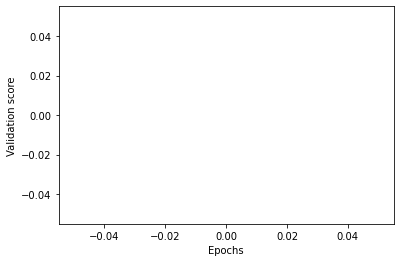

In [50]:
# Experimenting with wider networks
import matplotlib.pyplot as plt

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape = input_shape))

model_1.add(Dense(10, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_2
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape = input_shape))

model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

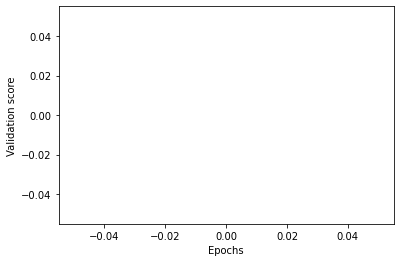

In [51]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Add the first, second, and third hidden layers
# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(50, activation='relu', input_shape = input_shape))

model_2.add(Dense(50, activation='relu'))

model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()
